# 1 Import Libraries and Loading Data

In [1]:
import csv
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
with open('Bank Reviews with cust ID v2.csv','r',encoding='latin1') as f:
    reader = csv.reader(f)
    complaintList = list(reader)

In [4]:
df = pd.DataFrame(complaintList)
df.columns = ['customerID', 'summary', 'complaintText']
df

,customerID,summary,complaintText
0,Customer_1,B*rstards who take pleasure in harrasing disab...,"As a disabled person in an empty branch, they ..."
1,Customer_10,BANK_NAME - dont bother as they have little r...,Bad customer service in branch and not enough ...
2,Customer_100,I visited the Bognor Regis BANK_NAME,I visited the Bognor Regis BANK_NAME Branch t...
3,Customer_101,Abysmal business service,Abysmal business service. If you are a busine...
4,Customer_102,Disgusting company,I have company account with BANK_NAME and got...
...,...,...,...
1800,Customer_1805,Utterly time wasting,Worst ever service I have ever received.a bun...
1801,Customer_1806,Amazing customer service from andreia,You are lucky to have a lady like Andrea in y...
1802,Customer_1807,Is this Bank or...,You are more likely to get offended than sort...
1803,Customer_1808,worst bank in the UK,You know you have to change banks when a tran...


# 2 Bag-of-words: Organising the text for ease of analysis

In [5]:
vectorizer = CountVectorizer(stop_words='english', min_df=0.005)
bagOfWords = vectorizer.fit_transform(df['complaintText'])
vectorizer.get_feature_names()

D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '10',
 '100',
 '1000',
 '11',
 '12',
 '14',
 '15',
 '16',
 '17',
 '18',
 '1st',
 '20',
 '200',
 '2014',
 '2015',
 '2016',
 '2017',
 '22',
 '24',
 '25',
 '250',
 '28',
 '30',
 '300',
 '30th',
 '35',
 '40',
 '45',
 '48',
 '50',
 '500',
 '60',
 '90',
 'ability',
 'able',
 'abroad',
 'absolute',
 'absolutely',
 'abysmal',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'account',
 'accounts',
 'act',
 'action',
 'actions',
 'active',
 'activity',
 'actual',
 'actually',
 'add',
 'added',
 'additional',
 'address',
 'admit',
 'admitted',
 'advantage',
 'advice',
 'advise',
 'advised',
 'adviser',
 'advisor',
 'advisors',
 'affected',
 'afford',
 'afternoon',
 'age',
 'agent',
 'agents',
 'ages',
 'ago',
 'agreed',
 'agreement',
 'allow',
 'allowed',
 'alternative',
 'amazing',
 'amounts',
 'angry',
 'annoying',
 'answer',
 'answered',
 'answering',
 'answers',
 'anymore',
 'apart',
 'apologies',
 'apology',
 'app',
 'appalling',
 'apparent',
 'apparently',
 'appear',
 'ap

In [6]:
bow_pd = pd.DataFrame(bagOfWords.toarray())
bow_pd.columns = vectorizer.get_feature_names()
bow_pd

D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,10,100,1000,11,12,14,15,16,...,writing,written,wrong,wrote,year,years,yes,yesterday,young,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1801,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3 Pareto of word frequency

In [7]:
sum_words = bagOfWords.sum(axis=0)
sum_words

matrix([[ 25,  43, 160, ...,  20,  25,  36]], dtype=int64)

In [8]:
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq

[('disabled', 32),
 ('person', 156),
 ('branch', 732),
 ('told', 607),
 ('walk', 20),
 ('area', 20),
 ('till', 24),
 ('complained', 35),
 ('said', 420),
 ('reported', 12),
 ('banking', 578),
 ('ombudsman', 49),
 ('asked', 319),
 ('bank_name', 2152),
 ('working', 116),
 ('day', 280),
 ('bank', 1579),
 ('does', 85),
 ('held', 20),
 ('available', 50),
 ('bad', 172),
 ('customer', 841),
 ('service', 907),
 ('want', 213),
 ('human', 24),
 ('machine', 75),
 ('clear', 59),
 ('finance', 16),
 ('come', 98),
 ('visited', 19),
 ('today', 153),
 ('pay', 305),
 ('sum', 11),
 ('cash', 154),
 ('account', 1893),
 ('works', 32),
 ('home', 99),
 ('isn', 31),
 ('able', 127),
 ('quite', 56),
 ('debit', 201),
 ('card', 774),
 ('using', 101),
 ('machines', 20),
 ('morning', 55),
 ('didnt', 21),
 ('properly', 19),
 ('tried', 228),
 ('twice', 65),
 ('times', 190),
 ('money', 795),
 ('returned', 41),
 ('receipt', 22),
 ('saying', 127),
 ('cancelled', 52),
 ('walked', 24),
 ('away', 148),
 ('paying', 93),
 ('co

In [9]:
words_freq = sorted(words_freq, key=lambda x:x[1], reverse=True)
words_freq

[('bank_name', 2152),
 ('account', 1893),
 ('bank', 1579),
 ('service', 907),
 ('customer', 841),
 ('money', 795),
 ('card', 774),
 ('branch', 732),
 ('time', 623),
 ('told', 607),
 ('banking', 578),
 ('phone', 547),
 ('just', 527),
 ('years', 507),
 ('business', 499),
 ('online', 471),
 ('said', 420),
 ('staff', 379),
 ('new', 379),
 ('ve', 360),
 ('don', 358),
 ('got', 339),
 ('like', 337),
 ('days', 334),
 ('asked', 319),
 ('pay', 305),
 ('went', 301),
 ('customers', 299),
 ('did', 288),
 ('day', 280),
 ('people', 273),
 ('help', 267),
 ('accounts', 260),
 ('need', 256),
 ('credit', 256),
 ('use', 254),
 ('make', 250),
 ('know', 245),
 ('mortgage', 245),
 ('called', 237),
 ('open', 234),
 ('going', 234),
 ('complaint', 233),
 ('minutes', 232),
 ('months', 231),
 ('good', 229),
 ('tried', 228),
 ('didn', 225),
 ('number', 224),
 ('banks', 220),
 ('company', 217),
 ('weeks', 215),
 ('want', 213),
 ('trying', 209),
 ('really', 205),
 ('say', 205),
 ('received', 202),
 ('debit', 201),
 

In [10]:
wordParetoDF = pd.DataFrame(words_freq, columns=['Word','Count'])
wordParetoDF

,Word,Count
0,bank_name,2152
1,account,1893
2,bank,1579
3,service,907
4,customer,841
...,...,...
1291,loose,10
1292,names,10
1293,reduce,10
1294,increasing,10


<AxesSubplot:xlabel='Word'>

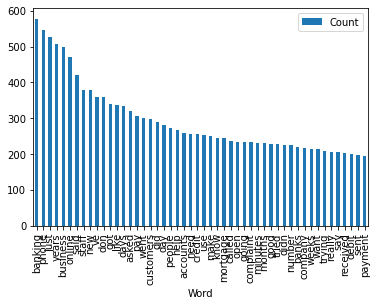

In [11]:
wordParetoDF[10:60].plot.bar(x='Word',y='Count')

# 4 Word-cloud

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [14]:
df['complaintText']

0       As a disabled person in an empty branch, they ...
1       Bad customer service in branch and not enough ...
2        I visited the Bognor Regis BANK_NAME Branch t...
3        Abysmal business service. If you are a busine...
4        I have company account with BANK_NAME and got...
                              ...                        
1800     Worst ever service I have ever received.a bun...
1801     You are lucky to have a lady like Andrea in y...
1802     You are more likely to get offended than sort...
1803     You know you have to change banks when a tran...
1804     You would think that a changing your address"...
Name: complaintText, Length: 1805, dtype: object

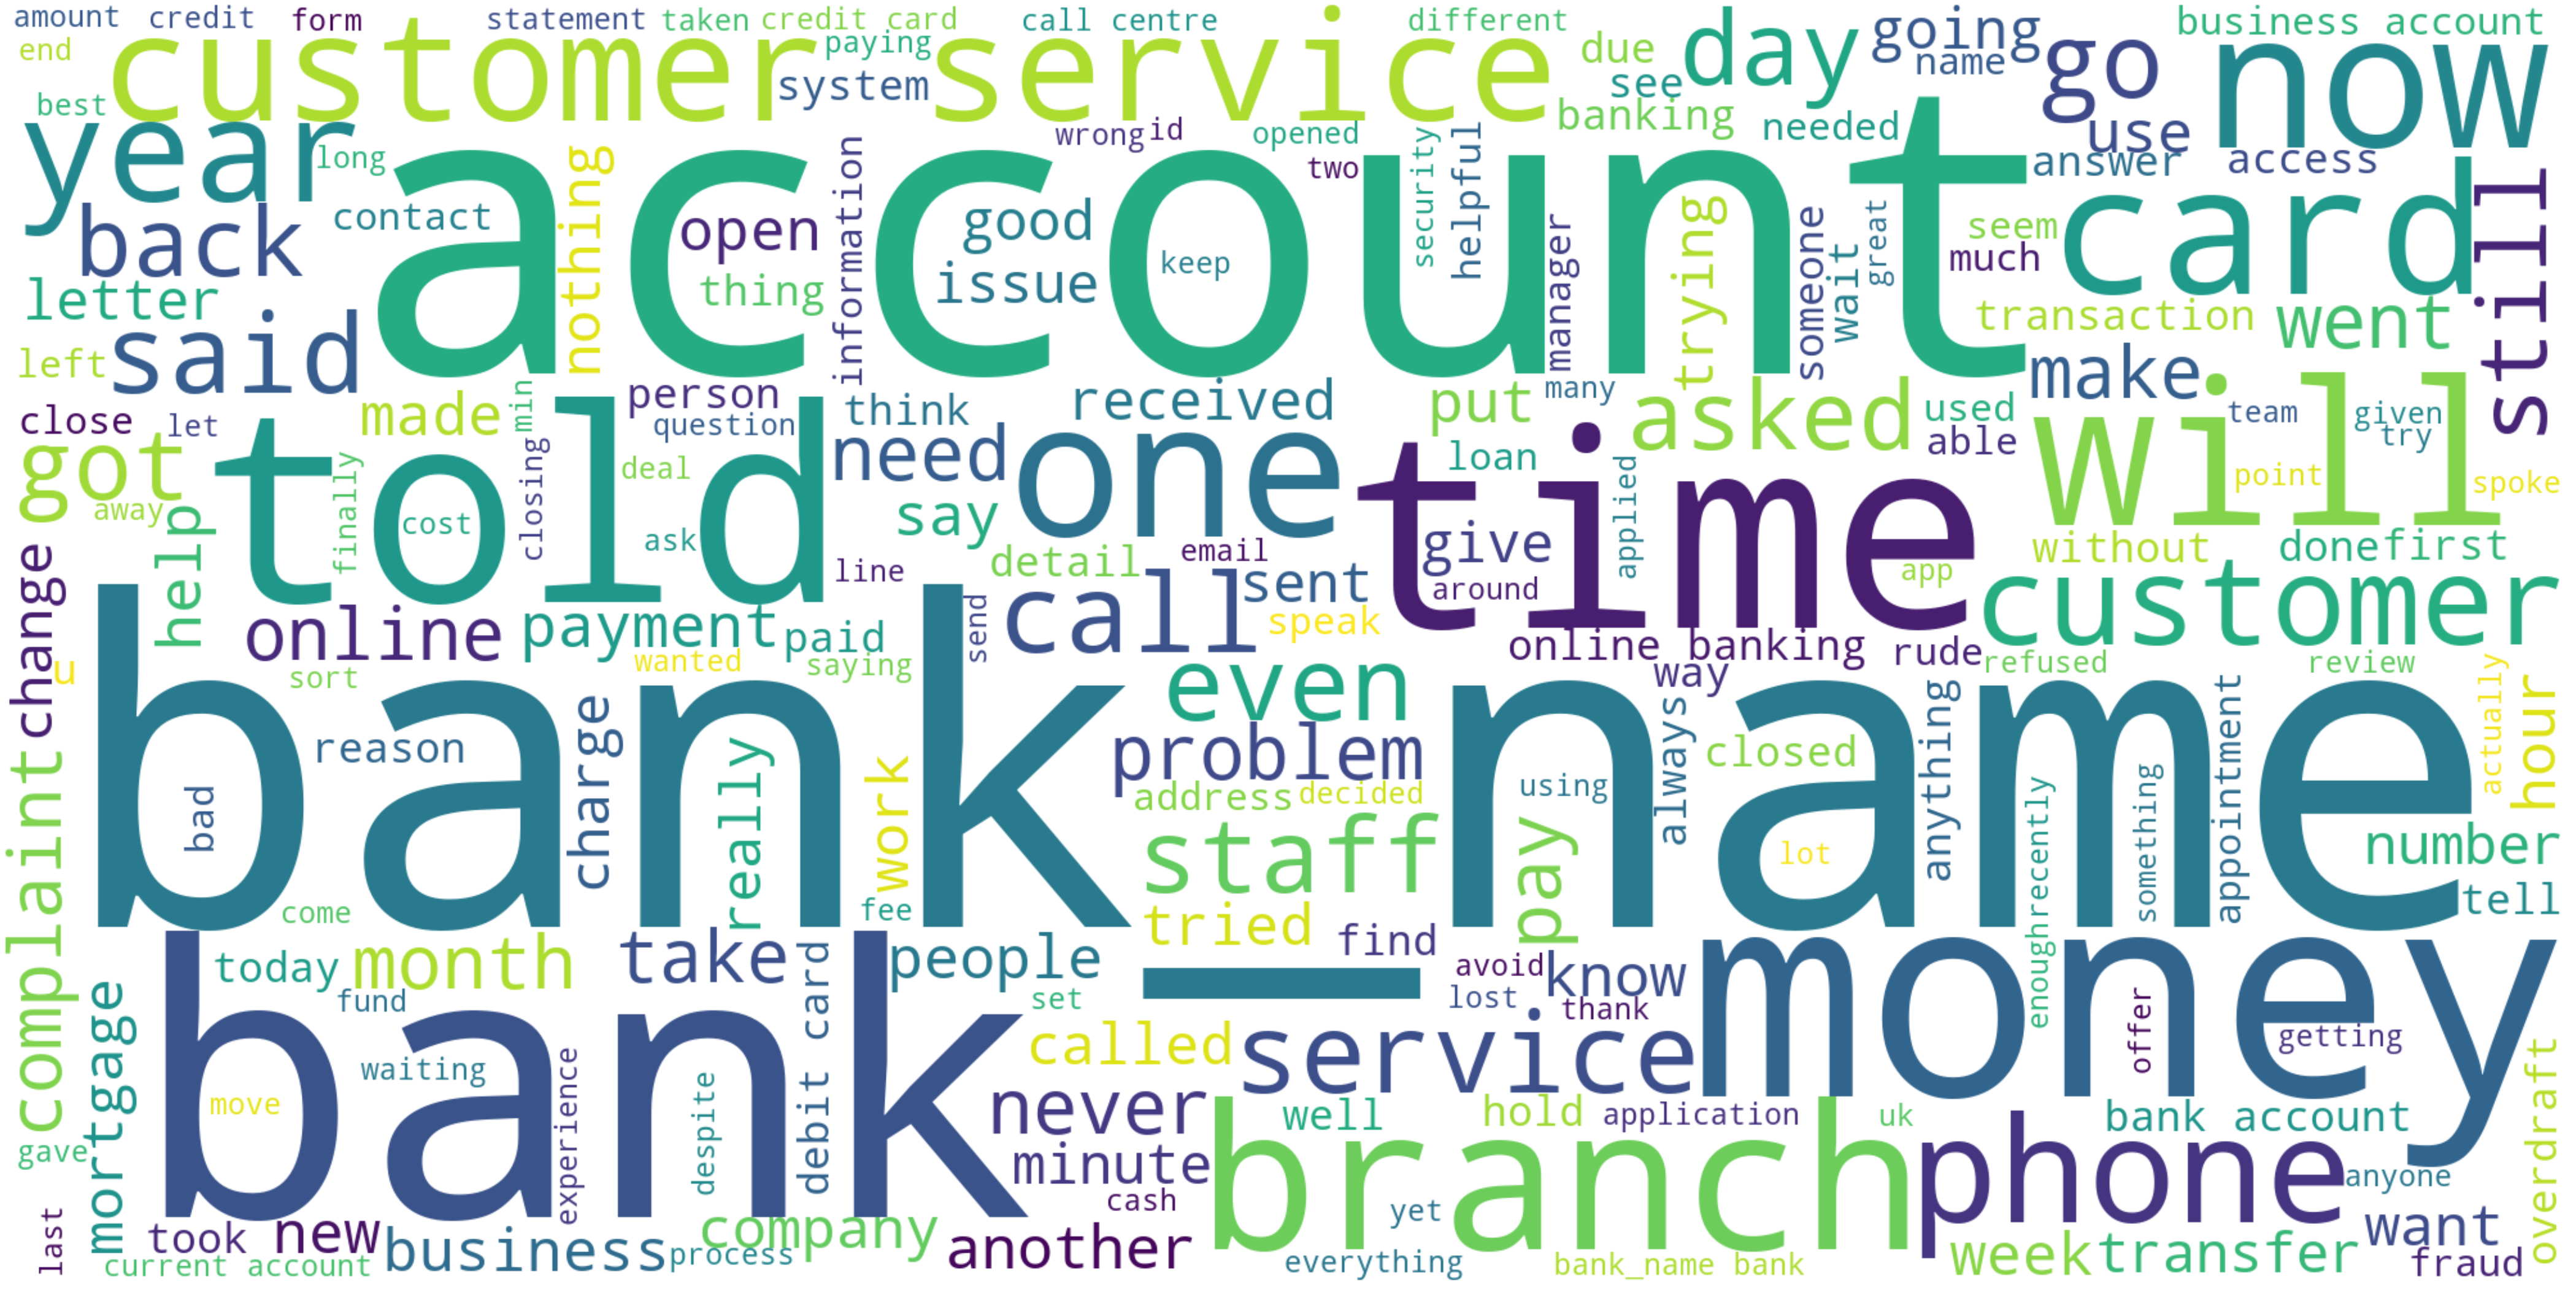

In [16]:
text = df.complaintText.to_list()
text = ' '.join(text).lower()
wordcloud = WordCloud(stopwords=STOPWORDS, collocations=True, background_color='white', width=2000, height=1000).generate(text)

plt.figure(figsize=(75,75))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

# 5 Part-of-Speech (POS) Tagging

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus.reader import tagged
from collections import OrderedDict

In [30]:
nltk.download()
stopwords_set = set(stopwords.words("english"))

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Lirz3/nltk_data'
    - 'D:\\ProgramData\\Anaconda3\\nltk_data'
    - 'D:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'D:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Lirz3\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [19]:
wordCount = {}

In [21]:
adjectives = {'JJ','JJR','JJS'}
adverbs = {'RB','RBR','RBS'}
nouns = {'NN','NNS','NNP','NPS'}
verbs = {'VB','VBD','VBN','VBP','VBZ'}
interestingTags = nouns
interestingTags

{'NN', 'NNP', 'NNS', 'NPS'}

In [25]:
tokenizer = nltk.tokenize.punkt.PunktSentenceTokenizer()
for complaint in complaintList:
    tokenized = tokenizer.tokenize(complaint[2])
    for toks in tokenized:
        words = nltk.word_tokenize(toks)
        tagged = nltk.pos_tag(words)
        for word, gramTag in tagged:
            word = word.lower()
            if not word in stopwords_set:
                if gramTag in interestingTags:
                    wordCount.setdefault((word, gramTag), 0)
                    wordCount[(word, gramTag)]+=1

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\Lirz3/nltk_data'
    - 'D:\\ProgramData\\Anaconda3\\nltk_data'
    - 'D:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'D:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Lirz3\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [31]:
wordCount

{}

In [32]:
sortWordCount = OrderedDict(sorted(wordCount.items(), key=lambda t:t[1], reverse=True))
sortWordCount

OrderedDict()

## 5.1 Charting words with a specific PoS Tag

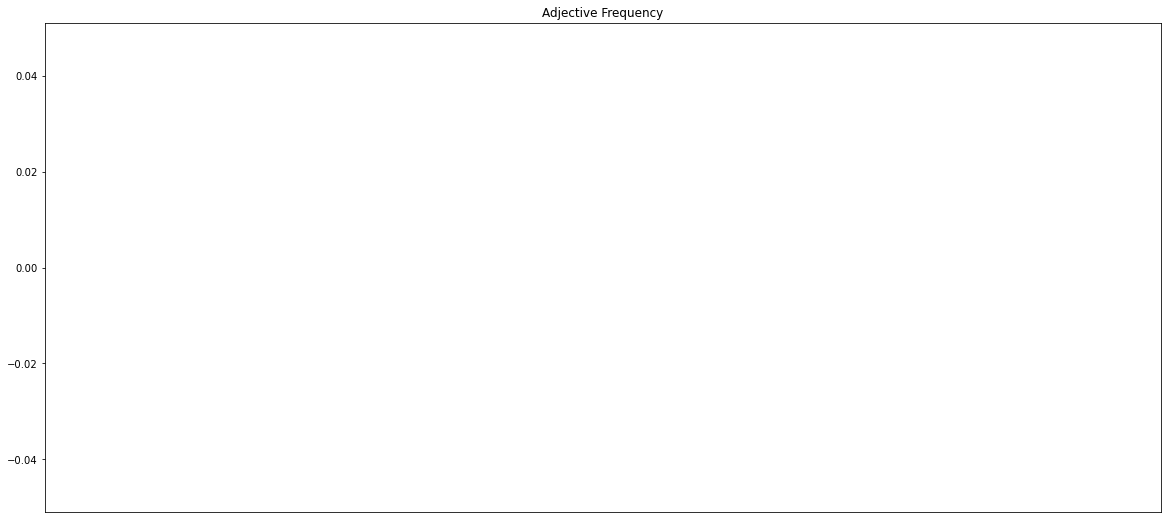

In [33]:
y = []
lables = []

for word, frequency in sortWordCount.items():
    y.append(frequency)
    lables.append(word[0])
    
listStart = 0
listEnd = 10
y = y[listStart:listEnd]
lables = lables[listStart:listEnd]

N = len(y)
x = range(N)
width = 0.7
plt.figure(figsize=(20,10))
plt.bar(x,y,width,color='cornflowerblue')
plt.title('Adjective Frequency')
plt.xticks(x,lables,rotation=60)
plt.margins(0.01)
plt.subplots_adjust(bottom=0.2)
plt.show()

# 6 Sentiment analysis

In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [36]:
happyStudent = 'this is an excellent Machine Learning workshop'
vader.polarity_scores(happyStudent)

{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.5719}

In [37]:
grumpyStudent = 'This Machine Learning workshop is terrible!'
vader.polarity_scores(grumpyStudent)

{'neg': 0.404, 'neu': 0.596, 'pos': 0.0, 'compound': -0.5255}

In [38]:
df

,customerID,summary,complaintText
0,Customer_1,B*rstards who take pleasure in harrasing disab...,"As a disabled person in an empty branch, they ..."
1,Customer_10,BANK_NAME - dont bother as they have little r...,Bad customer service in branch and not enough ...
2,Customer_100,I visited the Bognor Regis BANK_NAME,I visited the Bognor Regis BANK_NAME Branch t...
3,Customer_101,Abysmal business service,Abysmal business service. If you are a busine...
4,Customer_102,Disgusting company,I have company account with BANK_NAME and got...
...,...,...,...
1800,Customer_1805,Utterly time wasting,Worst ever service I have ever received.a bun...
1801,Customer_1806,Amazing customer service from andreia,You are lucky to have a lady like Andrea in y...
1802,Customer_1807,Is this Bank or...,You are more likely to get offended than sort...
1803,Customer_1808,worst bank in the UK,You know you have to change banks when a tran...


In [39]:
df['scores'] = df['complaintText'].apply(lambda complaintText: vader.polarity_scores(text=complaintText))
df

,customerID,summary,complaintText,scores
0,Customer_1,B*rstards who take pleasure in harrasing disab...,"As a disabled person in an empty branch, they ...","{'neg': 0.057, 'neu': 0.943, 'pos': 0.0, 'comp..."
1,Customer_10,BANK_NAME - dont bother as they have little r...,Bad customer service in branch and not enough ...,"{'neg': 0.079, 'neu': 0.833, 'pos': 0.088, 'co..."
2,Customer_100,I visited the Bognor Regis BANK_NAME,I visited the Bognor Regis BANK_NAME Branch t...,"{'neg': 0.098, 'neu': 0.902, 'pos': 0.0, 'comp..."
3,Customer_101,Abysmal business service,Abysmal business service. If you are a busine...,"{'neg': 0.1, 'neu': 0.855, 'pos': 0.045, 'comp..."
4,Customer_102,Disgusting company,I have company account with BANK_NAME and got...,"{'neg': 0.113, 'neu': 0.857, 'pos': 0.03, 'com..."
...,...,...,...,...
1800,Customer_1805,Utterly time wasting,Worst ever service I have ever received.a bun...,"{'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compou..."
1801,Customer_1806,Amazing customer service from andreia,You are lucky to have a lady like Andrea in y...,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp..."
1802,Customer_1807,Is this Bank or...,You are more likely to get offended than sort...,"{'neg': 0.158, 'neu': 0.749, 'pos': 0.094, 'co..."
1803,Customer_1808,worst bank in the UK,You know you have to change banks when a tran...,"{'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'comp..."


In [40]:
df['scores'][0]

{'neg': 0.057, 'neu': 0.943, 'pos': 0.0, 'compound': -0.5848}

In [41]:
df['compound'] = df['scores'].apply(lambda score_dict:score_dict['compound'])

In [42]:
df

,customerID,summary,complaintText,scores,compound
0,Customer_1,B*rstards who take pleasure in harrasing disab...,"As a disabled person in an empty branch, they ...","{'neg': 0.057, 'neu': 0.943, 'pos': 0.0, 'comp...",-0.5848
1,Customer_10,BANK_NAME - dont bother as they have little r...,Bad customer service in branch and not enough ...,"{'neg': 0.079, 'neu': 0.833, 'pos': 0.088, 'co...",-0.1531
2,Customer_100,I visited the Bognor Regis BANK_NAME,I visited the Bognor Regis BANK_NAME Branch t...,"{'neg': 0.098, 'neu': 0.902, 'pos': 0.0, 'comp...",-0.9770
3,Customer_101,Abysmal business service,Abysmal business service. If you are a busine...,"{'neg': 0.1, 'neu': 0.855, 'pos': 0.045, 'comp...",-0.7853
4,Customer_102,Disgusting company,I have company account with BANK_NAME and got...,"{'neg': 0.113, 'neu': 0.857, 'pos': 0.03, 'com...",-0.8811
...,...,...,...,...,...
1800,Customer_1805,Utterly time wasting,Worst ever service I have ever received.a bun...,"{'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compou...",-0.8020
1801,Customer_1806,Amazing customer service from andreia,You are lucky to have a lady like Andrea in y...,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...",0.9488
1802,Customer_1807,Is this Bank or...,You are more likely to get offended than sort...,"{'neg': 0.158, 'neu': 0.749, 'pos': 0.094, 'co...",-0.7177
1803,Customer_1808,worst bank in the UK,You know you have to change banks when a tran...,"{'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'comp...",-0.4767


In [43]:
sortedSentiment = df.sort_values('compound')
sortedSentiment

,customerID,summary,complaintText,scores,compound
207,Customer_287,Bunch of crooks,Bunch of crooks Finally I spoke to the ombu...,"{'neg': 0.12, 'neu': 0.835, 'pos': 0.045, 'com...",-0.9962
696,Customer_73,Awful bank,Awful bank! They still hold my money without ...,"{'neg': 0.282, 'neu': 0.68, 'pos': 0.038, 'com...",-0.9955
190,Customer_270,Appalling service after fraud,Absolutely appalling experience with the frau...,"{'neg': 0.122, 'neu': 0.851, 'pos': 0.027, 'co...",-0.9952
662,Customer_7,No Customer service and no staff training,I have been a BANK_NAME Customer for the past ...,"{'neg': 0.171, 'neu': 0.791, 'pos': 0.038, 'co...",-0.9945
1663,Customer_1668,An unethical and immoral company that has cau...,I've banked with BANK_NAME for 25 years so I'...,"{'neg': 0.168, 'neu': 0.768, 'pos': 0.064, 'co...",-0.9944
...,...,...,...,...,...
1039,Customer_1044,Shambles,I can only imagine that anyone who gave BANK_...,"{'neg': 0.013, 'neu': 0.876, 'pos': 0.111, 'co...",0.9914
1707,Customer_1712,"Racism, incopetence and a way to feel how rid...",Ok...a story! A real one! (Croce my hart)In t...,"{'neg': 0.044, 'neu': 0.825, 'pos': 0.131, 'co...",0.9921
994,Customer_999,"Unhelpful, bad technology, deteriorating serv...",Have been with NW for almost 30years. That wa...,"{'neg': 0.064, 'neu': 0.651, 'pos': 0.284, 'co...",0.9953
961,Customer_966,"One of the best bank, I cannot recommend enough",First of all thank you for reading the review...,"{'neg': 0.044, 'neu': 0.736, 'pos': 0.22, 'com...",0.9960


In [44]:
sortedSentiment.loc[696].complaintText

" Awful bank! They still hold my money without legal consent. I ordered to transfer my  money to an accout i hold with another bank because I do not have a current account with BANK_NAME and they are reluctant to do the process; all excuses and apologies. Hence, I cannot use my money at all. I am in a hopeless situation where it seems that so much hard work and effort has been wasted because the bank is archaic and dishonest. These people are thieves and the courts have been informed. Soon they will also have to pay compensation. Upon the successful prosecution, I will do everything possible to destroy their reputation, since the media will be informed for their actions. This bank is the absolute evil. Thieves, corrupt, lazy, incompetent, reptiles, dishonest... plus, I will have to add the unhelpful customer service, the ridiculous system with their security checks that treats the customer like potential thieves, while the only thieves are themselves for holding without my consent 1200

In [45]:
sortedSentiment.iloc[1750].complaintText

' Telephoned to ask if I could move my bank charges nearer my pay date. Charges were £66 ended up with £220 charges occurred within last 12 months  being refunded on a goodwill gesture .  Spoke to Amir and he was really helpful and gave good advice and suggestions about the account have got.  He made my day as it was a total surprise to be awarded so much money back when I was expecting less.. excellent service  I feel like I won a prize. Can also buy daughter new shoes for school as current ones are talking to her... '

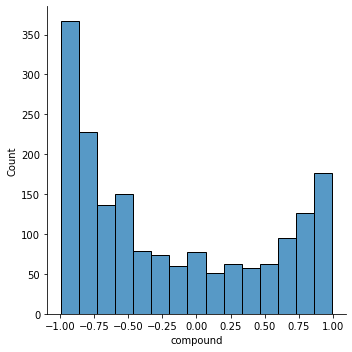

In [46]:
import seaborn as sns
sns.displot(df, x="compound", bins=15)

# 8 Identifying themes in text

In [47]:
vectorized = pd.DataFrame(bagOfWords.toarray(), columns=vectorizer.get_feature_names())
vectorized

D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,10,100,1000,11,12,14,15,16,...,writing,written,wrong,wrote,year,years,yes,yesterday,young,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1801,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.decomposition import NMF

In [49]:
def display_topics(model, feature_names, num_top_words):
    for ix, topic in enumerate(model.components_):
        print("\nTopic", ix)
        print(", ".join([feature_names[i] for i in topic.argsort()[:-num_top_words -1:-1]]))

In [50]:
n_themes = 20
n_iterations = 1000
n_top_words = 10

nmf_model = NMF(n_components=n_themes, random_state=1, alpha=.1, l1_ratio=.5,init='nndsvd',max_iter=n_iterations).fit(vectorized)

D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(


In [51]:
display_topics(nmf_model, vectorizer.get_feature_names(), n_top_words)


Topic 0
bank_name, company, years, accounts, use, say, investor, problem, smart, took

Topic 1
account, open, opened, closed, close, current, opening, reason, direct, went

Topic 2
card, debit, new, sent, address, pin, received, blocked, cards, home

Topic 3
bank, went, team, transaction, pay, worst, like, want, closed, staff

Topic 4
branch, appointment, local, address, went, needed, id, centre, called, change

Topic 5
money, pay, account, paid, payment, transfer, cash, want, people, don

Topic 6
service, customer, years, customers, terrible, poor, team, rude, services, 20

Topic 7
business, personal, accounts, banking, years, manager, know, need, don, number

Topic 8
mortgage, property, new, solicitor, woolwich, weeks, application, years, having, house

Topic 9
banking, online, telephone, access, transfer, pin, tried, need, app, accounts

Topic 10
said, asked, went, didn, did, know, customer, manager, open, let

Topic 11
phone, number, hold, minutes, calls, security, hour, contact, 

D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
